# Importing libraries

In [776]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

# Importing data

In [777]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\ML_Ach1\ClimateWins'

In [778]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\ML_Ach1\\ClimateWins'

In [779]:
weather = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Weather_scaled.pkl'))

In [780]:
weather.head()

DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101 -1.599964           0.660514          -0.02793        0.826097   
1  19600102 -1.599964           0.244897          -0.02793        0.735760   
2  19600103 -1.599964           1.076130          -0.02793        1.277781   
3  19600104 -1.599964          -1.001953          -0.02793        1.458455   
4  19600105 -1.599964           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1         -0.179228       -0.810126  ...              0.783085   
2         -0.179228       -1.065304  ...              0.783085   
3         -0.179228       -0.114186  ...              0.783085   
4         -0.179228        0.187388  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 170 columns]

In [781]:
weather.shape

(22950, 170)

In [782]:
# Reducing to just mean temperatures
weather.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [783]:
# Filtering mean temperature columns
mean_temp = weather.filter(regex='temp_mean$', axis=1)

In [784]:
mean_temp.columns

Index(['BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean',
       'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'GDANSK_temp_mean',
       'HEATHROW_temp_mean', 'KASSEL_temp_mean', 'LJUBLJANA_temp_mean',
       'MAASTRICHT_temp_mean', 'MADRID_temp_mean', 'MUNCHENB_temp_mean',
       'OSLO_temp_mean', 'ROMA_temp_mean', 'SONNBLICK_temp_mean',
       'STOCKHOLM_temp_mean', 'TOURS_temp_mean', 'VALENTIA_temp_mean'],
      dtype='object')

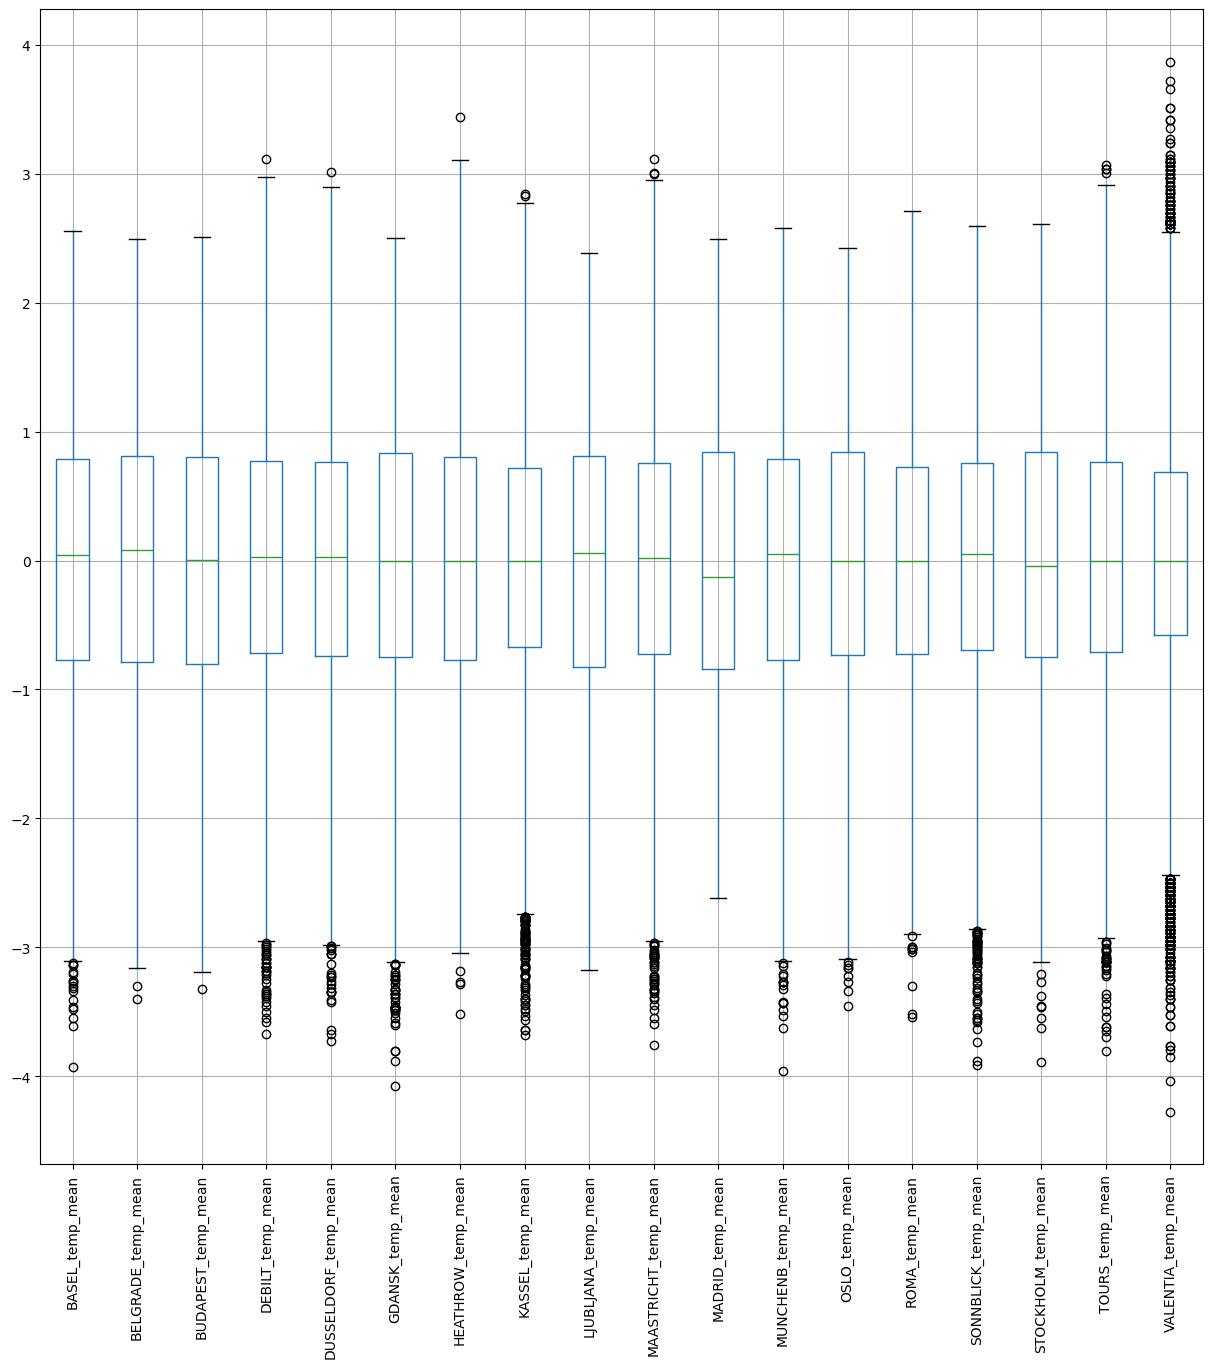

In [785]:
# Looking at a whisker plot of the data to see variations in temperatures
mean_temp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [786]:
# Reducing the dataset to a single year
df_year = weather[weather['DATE'].astype(str).str.contains('1990')]
df_year

DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
10958  19900101 -1.599964          -2.248803         -0.027930   
10959  19900102 -1.599964          -1.417570         -0.027930   
10960  19900103 -1.599964           1.076130         -0.027930   
10961  19900104 -1.599964          -1.417570         -0.027930   
10962  19900105 -1.599964           0.660514         -0.027930   
...         ...       ...                ...               ...   
11318  19901227  1.594371           0.660514          5.705005   
11319  19901228  1.594371          -1.001953          0.791061   
11320  19901229  1.594371           0.660514          3.794027   
11321  19901230  1.594371           1.076130          1.337054   
11322  19901231  1.594371           1.076130          0.518064   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
10958        0.645423        0.563561               -0.800359   
10959        0.735760        0.884527               -0.929233   
10960        1.187444        0.777538               -1.229941   
10961        0.103401        1.297196               -0.864796   
10962        0.464749        1.618161               -1.197722   
...               ...             ...                     ...   
11318       -0.348283       -0.949560               -1.079587   
11319       -0.438620        0.471857               -0.800359   
11320       -0.528957       -0.261778               -1.272899   
11321       -0.167609        0.624698               -1.315857   
11322        1.639129        0.395437               -1.305118   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
10958            -0.445514         -0.179228        0.604953  ...   
10959            -0.445514         -0.179228       -0.531750  ...   
10960            -0.445514         -0.179228       -1.065304  ...   
10961            -0.445514         -0.179228        0.233784  ...   
10962            -0.365351         -0.179228       -1.018908  ...   
...                    ...               ...             ...  ...   
11318            -0.205026         -0.179228       -0.694136  ...   
11319            -0.405433         -0.179228        0.465765  ...   
11320             0.576562         -0.179228       -1.042106  ...   
11321             0.576562         -0.179228       -1.065304  ...   
11322             0.997417         -0.179228       -1.065304  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
10958             -1.670486          -0.081896          -0.693801   
10959             -0.443701          -0.503721          -0.954822   
10960             -1.057093           1.042971          -0.451424   
10961              0.169692           1.464796          -0.283624   
10962             -1.057093           1.183580          -0.320913   
...                     ...                ...                ...   
11318              0.169692          -1.347371          -0.721768   
11319              0.783085           0.058712          -1.961620   
11320              0.169692          -1.066155          -1.775176   
11321             -0.443701          -0.644330          -0.814989   
11322             -0.443701           0.339929          -0.572612   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
10958                  -1.100962                0.112794            -0.024706   
10959                  -1.089181                1.260825            -0.024706   
10960                  -0.888897               -0.490810            -0.024706   
10961                  -1.183432                0.598044            -0.024706   
10962                  -1.100962                0.171971            -0.024706   
...                          ...                     ...                  ...   
11318                  -1.018492                0.811081            -0.024706   
11319                  -1.136306                0.834752            -0.024706   
11320                  -1.136306                0.

In [787]:
df_year.describe()

DATE       MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
count  3.650000e+02  365.000000         365.000000        365.000000   
mean   1.990067e+07    0.004762          -0.158194          0.013206   
std    3.454755e+02    1.002610           1.087613          0.740024   
min    1.990010e+07   -1.599964          -2.248803         -2.484902   
25%    1.990040e+07   -0.728781          -1.001953         -0.027930   
50%    1.990070e+07    0.142401           0.244897         -0.027930   
75%    1.990100e+07    1.013583           0.660514         -0.027930   
max    1.990123e+07    1.594371           1.076130          7.615984   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count      365.000000      365.000000              365.000000   
mean        -0.169342        0.185606               -0.045913   
std          0.963288        1.288116                0.965310   
min         -2.968054       -4.495461               -1.315857   
25%         -0.799968       -0.613311               -0.886275   
50%         -0.167609        0.181460               -0.231162   
75%          0.555086        0.899811                0.660220   
max          1.729466        4.078894                2.088581   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
count           365.000000        365.000000      365.000000  ...   
mean              0.001696         -0.005792        0.110676  ...   
std               0.953020          0.909860        1.023726  ...   
min              -0.445514         -0.179228       -1.065304  ...   
25%              -0.445514         -0.179228       -0.879720  ...   
50%              -0.445514         -0.179228       -0.021394  ...   
75%               0.035463         -0.179228        0.906527  ...   
max               6.007594          7.796099        2.298407  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
count            365.000000         365.000000         365.000000   
mean               0.083985           0.031361           0.058564   
std                1.112739           1.077445           1.117722   
min               -3.510664          -3.456497          -3.863348   
25%               -0.443701          -0.784938          -0.535324   
50%                0.169692           0.058712           0.219774   
75%                0.783085           0.902363           0.816395   
max                1.396477           2.308447           2.513035   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
count                 365.000000              365.000000         3.650000e+02   
mean                   -0.027497               -0.056436        -2.470616e-02   
std                     1.053039                0.646063         3.126788e-17   
min                    -1.195214               -0.490810        -2.470616e-02   
25%                    -0.912459               -0.490810        -2.470616e-02   
50%                    -0.429421               -0.348786        -2.470616e-02   
75%                     0.713377                0.160135        -2.470616e-02   
max                     2.657311                3.000625        -2.470616e-02   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
count         365.000000          365.000000         365.000000   
mean           -0.073947            0.135022           0.104597   
std             1.118295            1.096645           1.068290   
min            -1.039536           -2.290492          -2.596636   
25%            -1.009500           -0.788384          -0.711036   
50%            -0.498891            0.142923           0.163445   
75%             0.522326            0.863935           0.901288   
max             3.345692            2.966887           2.677577   

       VALENTIA_temp_max  
count         365.000000  
mean            0.154781  
std             1.145008  
min            -2.736537  
25%            -0.694721  
50%             0.052986  
75%          

In [788]:
df = df_year.drop(['DATE','MONTH'], axis=1)

In [789]:
df

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
10958          -2.248803         -0.027930        0.645423        0.563561   
10959          -1.417570         -0.027930        0.735760        0.884527   
10960           1.076130         -0.027930        1.187444        0.777538   
10961          -1.417570         -0.027930        0.103401        1.297196   
10962           0.660514         -0.027930        0.464749        1.618161   
...                  ...               ...             ...             ...   
11318           0.660514          5.705005       -0.348283       -0.949560   
11319          -1.001953          0.791061       -0.438620        0.471857   
11320           0.660514          3.794027       -0.528957       -0.261778   
11321           1.076130          1.337054       -0.167609        0.624698   
11322           1.076130          0.518064        1.639129        0.395437   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
10958               -0.800359            -0.445514         -0.179228   
10959               -0.929233            -0.445514         -0.179228   
10960               -1.229941            -0.445514         -0.179228   
10961               -0.864796            -0.445514         -0.179228   
10962               -1.197722            -0.365351         -0.179228   
...                       ...                  ...               ...   
11318               -1.079587            -0.205026         -0.179228   
11319               -0.800359            -0.405433         -0.179228   
11320               -1.272899             0.576562         -0.179228   
11321               -1.315857             0.576562         -0.179228   
11322               -1.305118             0.997417         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
10958        0.604953        -1.696559       -1.520087  ...   
10959       -0.531750        -1.655817       -1.566071  ...   
10960       -1.065304        -1.710140       -1.612055  ...   
10961        0.233784        -1.506430       -1.443447  ...   
10962       -1.018908        -1.411366       -1.443447  ...   
...               ...              ...             ...  ...   
11318       -0.694136        -0.515042       -0.692371  ...   
11319        0.465765        -0.895301       -0.723027  ...   
11320       -1.042106        -0.012558       -0.370482  ...   
11321       -1.065304         0.218313        0.303953  ...   
11322       -1.065304        -0.297752        0.166001  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
10958             -1.670486          -0.081896          -0.693801   
10959             -0.443701          -0.503721          -0.954822   
10960             -1.057093           1.042971          -0.451424   
10961              0.169692           1.464796          -0.283624   
10962             -1.057093           1.183580          -0.320913   
...                     ...                ...                ...   
11318              0.169692          -1.347371          -0.721768   
11319              0.783085           0.058712          -1.961620   
11320              0.169692          -1.066155          -1.775176   
11321             -0.443701          -0.644330          -0.814989   
11322             -0.443701           0.339929          -0.572612   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
10958                  -1.100962                0.112794            -0.024706   
10959                  -1.089181                1.260825            -0.024706   
10960                  -0.888897               -0.490810            -0.024706   
10961                  -1.183432                0.598044            -0.024706   
10962                  -1.100962                0.171971            -0.024706   
...                          ...                     ...                  ...   
11318                  -1.018492                0.81

In [790]:
# Plotting all weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [791]:
# Indexing - creating a set of data from 1 to 365 (as 1990 was no leap year!)
# Scaling by 100 as the index is made. This will help the gradient descent converge 365 = 3.65
i = np.arange(0.01,3.66,0.01)
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [792]:
n_rows = df_year.shape[0]
n_rows

365

In [793]:
# Translating chosen weather data into X and y datasets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)
# Representing x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_year['MADRID_temp_mean'].to_numpy().reshape(n_rows,1)

In [794]:
X.shape, y.shape

((365, 2), (365, 1))

In [795]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=df_year['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [796]:
# What's the min temperature? (Note gradient descent is not actually finding this number)
df_year['MADRID_temp_mean'].min()

-1.743109449208083

In [797]:
# What's the max temperature? (Note gradient descent is not actually finding this number)
df_year['MADRID_temp_mean'].max()

2.1658266305512592

In [798]:
# Computing the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initializing loss to zero
    
    # reshaping theta
    theta=theta.reshape(2,1)
    
    # calculating the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtracting y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # dividing by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [799]:
compute_cost(X,y)

array([0.52425693])

In [800]:
# Gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # updating theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # storing history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [801]:
%%time
# Running the data through a gradiant descent for starting conditions in 'theta_init.'
# And adjusting numbers

num_iterations=100 #<---Deciding on how many iterations are needed, starting small and working up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[-1]]) #<---Putting a guess for [theta0], [theta1], while starting with 1 and 1.
alpha=0.01 #<---Deciding on the step size, trying values between 0.1 and 0.00001 and adjusting iterations.
# If the solution is not converging -> smaller step size
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 297 ms
Wall time: 328 ms


In [802]:
theta

array([[ 0.96384234],
       [-0.36714248]])

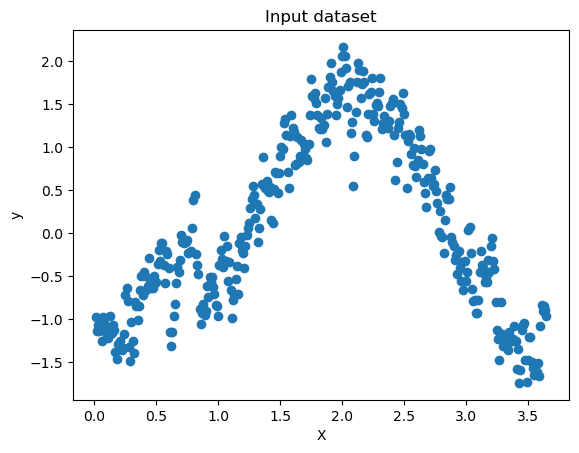

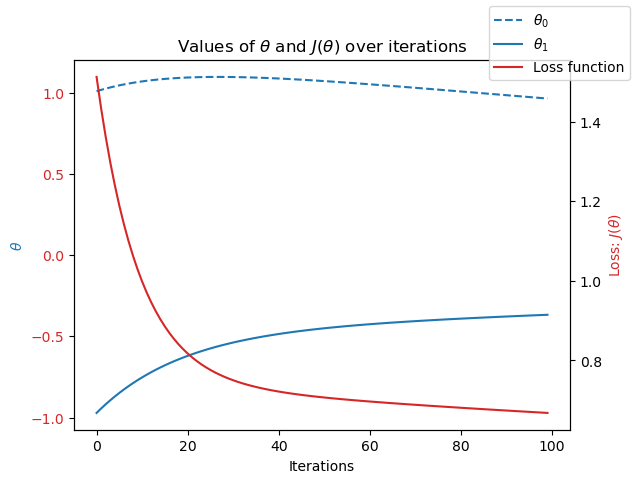

In [803]:
# Plotting the loss, theta0, and theta1. If the result is looking like a straight line, it's not converging on an answer!
# Theloss (in red) should be trending towards 0.

fig, ax1 = plt.subplots()

# Plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# Plotting loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

# plot
plt.show()

In [804]:
%%time
# Theta range
theta0_vals = np.linspace(3,-3,100) # Looking in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(3,-3,100) # Putting those values as the first two "linspace" numbers in these lines
                                      # Selecting with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Computing cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitializing to 0

CPU times: total: 9 s
Wall time: 9.53 s


In [805]:
# Showing the loss function

#X = Theta0
#Y = Theta1
#Z = Loss
# Finding where it is closest to 0 in X and Y!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [806]:
# Same figure as above, with the line the loss function takes towards the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#Black line = path of loss function over the iterations.
#Where is it closest to 0 in X and Y!?

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
# Below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [807]:
# Rerunning the optimization above, but this time starting closer to the objective!
# Finding where the black line ends near the lowest X/Y/Z coordinate and making that the guess below.

num_iterations=10000 #<---starting with the same iterations as above
theta_init=np.array([[0],[-0.7]]) #<---making a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.0001 #<---starting with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [808]:
# Looking at the new loss path on the function, should be starting much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
# Below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [809]:
# Saving
fig.write_html("loss_function.html")
fig.write_image("loss_function.png")